## **Part I: Exploratory Data Analysis**

### Link to all the necessary datasets found below
#### [original insurance dataset](https://drive.google.com/file/d/1xBJU-VDwKPJZM4sNAmj5L6FQd1w23MEb/view?usp=sharing)
#### [dirty insurance dataset](https://drive.google.com/file/d/1LVHsRu9OpgyPgdRitcS9JKYFk5x1Rhlo/view?usp=sharing)

In this section we will explore the data set and be able to check the following:

1. Structure of the data
2. Summary statistics
3. Variability of column entries
4. Uniqueness of rows
5. Completeness of the data
6. Consistency of labels
7. Patterns and anomalies






# Activity 1: Creating a Pricing Model for Insurance Premiums

Today we will explore a data set dedicated to the cost of treatment of different patients.  The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis.
In any case, I wish you to be healthy!
Let's look at our data. 


### Content

Columns 

*   age: age of primary beneficiary 
*   sex: insurance contractor gender, female, male  
*   bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9  
*   children: Number of children covered by health insurance / Number of dependents 
*   smoker: Smoking  
*   region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.  
*   charges: Individual medical costs billed by health insurance 




### Inspiration
Can you accurately predict insurance costs?  

In [ ]:
# Load necessary libraries

import os
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
import warnings
warnings.filterwarnings('ignore')

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})


In [ ]:
# Upload the insurance dataset from local computer to colab

from google.colab import files
files.upload()


In [ ]:
# Load the insurance.csv data set

insurance_df = pd.read_csv('dirty_insurance.csv')
insurance_df.head(10)

,customer_id,age,sex,bmi,children,smoker,region,charges
0,m18331172523,18,male,33.77,1,no,southeast,1725.55230
1,m18340113711,18,male,34.10,0,no,southeast,NaN
2,f18260219885,18,female,NaN,0,no,nrtheast,2198.18985
3,f18382339335,18,woman,38.67,2,no,northeast,3393.35635
4,f18350221175,18,female,35.63,0,no,n.west,2211.13075
5,f18350221175,18,female,35.63,0,no,n.west,2211.13075
6,f18300213467,18,female,30.12,0,no,northeast,21344.84670
7,m18230170545,18,man,NaN,0,no,nrtheast,NaN
8,m18250155125,18,male,25.18,0,no,northeast,15518.18025
9,f18360361435,18,female,36.85,0,no,s.east,36149.48350


#### **1 Structure of the data** 

Check structure of the data: dimensions, column names, data types, format, etc.

In [ ]:
# Return a tuple representing the dimensionality of the DataFrame
# documentation here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape

insurance_df.shape

(1339, 8)

In [ ]:
# print information about the DataFrame including the data types, column names, non-null values and memory usage
# documentation here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1339 non-null   object 
 1   age          1339 non-null   int64  
 2   sex          1339 non-null   object 
 3   bmi          1337 non-null   float64
 4   children     1339 non-null   int64  
 5   smoker       1339 non-null   object 
 6   region       1339 non-null   object 
 7   charges      1336 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [ ]:
insurance_df.columns

Index(['customer_id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [ ]:
insurance_df.dtypes

customer_id     object
age              int64
sex             object
bmi            float64
children         int64
smoker          object
region          object
charges        float64
dtype: object

#### **2 Summary statistics**

Check mean, median, mode, variability of the numerical columns

In [ ]:
# Generate descriptive statistics including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
# documentation here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe

insurance_df.describe()

,age,bmi,children,charges
count,1339.000000,1337.000000,1339.000000,1336.000000
mean,39.194922,30.678751,1.092606,13264.230983
std,14.051691,6.098401,1.205529,12100.401585
min,18.000000,15.960000,0.000000,1121.873900
25%,26.500000,26.320000,0.000000,4744.325050
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_df.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [ ]:
insurance_df.mode()

,customer_id,age,sex,bmi,children,smoker,region,charges
0,f18350221175,18.0,male,32.3,0.0,no,southeast,1639.56310
1,m19300163931,NaN,NaN,NaN,NaN,NaN,NaN,1826.84300
2,m23340182643,NaN,NaN,NaN,NaN,NaN,NaN,2211.13075


In [ ]:
#@title
# variance with ddof = 0
# sum((x_i - x_mean)^2) / n

insurance_df.var(ddof=0)

age         1.973026e+02
bmi         3.716268e+01
children    1.452216e+00
charges     1.463101e+08
dtype: float64

In [ ]:
#@title
# variance with ddof = 1
# sum((x_i - x_mean)^2) / (n-1)

insurance_df.var(ddof=1)

age         1.974500e+02
bmi         3.719050e+01
children    1.453301e+00
charges     1.464197e+08
dtype: float64

In [ ]:
#@title
# mean (average) absolute deviation

insurance_df.mad()

age           12.251788
bmi            4.899145
children       0.984833
charges     9077.133361
dtype: float64

#### **3 Variability of column entries**

In [ ]:
# to count distinct / unique values on pandas

print(insurance_df['customer_id'].nunique())

# to count the non-null values

print(insurance_df['customer_id'].count())

1336
1339


In [1]:
# inspect all categorical variables

print(insurance_df['sex'].value_counts())
print(insurance_df['smoker'].value_counts())
print(insurance_df['region'].value_counts())

NameError: name 'insurance_df' is not defined

In [ ]:
# inspect all numerical variables

print(insurance_df['age'].value_counts(bins=4))
print(insurance_df['bmi'].value_counts(bins=4))
print(insurance_df['children'].value_counts(bins=4))
print(insurance_df['charges'].value_counts(bins=4))

(17.953, 29.5]    418
(41.0, 52.5]      312
(29.5, 41.0]      311
(52.5, 64.0]      298
Name: age, dtype: int64
(25.252, 34.545]    737
(34.545, 43.838]    312
(15.922, 25.252]    259
(43.838, 53.13]      29
Name: bmi, dtype: int64
(-0.006, 1.25]    900
(1.25, 2.5]       239
(2.5, 3.75]       157
(3.75, 5.0]        43
Name: children, dtype: int64
(1059.224, 16784.012]     1004
(16784.012, 32446.151]     179
(32446.151, 48108.289]     137
(48108.289, 63770.428]      16
Name: charges, dtype: int64


#### **4 Completeness of the data**

In [ ]:
# get the total sum of missing values in each column

insurance_df.isnull().sum()

customer_id    0
age            0
sex            0
bmi            2
children       0
smoker         0
region         0
charges        3
dtype: int64

In [ ]:
# get the total sum of non-null values in each column

insurance_df.notnull().sum()

customer_id    1339
age            1339
sex            1339
bmi            1337
children       1339
smoker         1339
region         1339
charges        1336
dtype: int64

#### **5 Uniqueness of rows**

Lets look for duplicate rows on the insurance dataset

In [ ]:
# return all duplicated rows based on a column

print(insurance_df[insurance_df.duplicated(['customer_id'], keep=False)])

      customer_id  age     sex    bmi  children smoker     region     charges
4    f18350221175   18  female  35.63         0     no     n.west  2211.13075
5    f18350221175   18  female  35.63         0     no     n.west  2211.13075
80   m19300163931   19    male  30.59         0     no  northwest  1639.56310
107  m19300163931   19    male  30.59         0     no  northwest  1639.56310
222  m23340182643   23    male  34.40         0     no     s.west  1826.84300
223  m23340182643   23    male  34.40         0     no     s.west  1826.84300


In [ ]:
# print the duplicated rows
duplicate_rows = insurance_df[insurance_df.duplicated()]
print(duplicate_rows)

      customer_id  age     sex    bmi  children smoker     region     charges
5    f18350221175   18  female  35.63         0     no     n.west  2211.13075
107  m19300163931   19    male  30.59         0     no  northwest  1639.56310
223  m23340182643   23    male  34.40         0     no     s.west  1826.84300


#### **6 Patterns and Anomalies (Visualize)**

##### Data Viz Mantra

###### Overview first, zoom and filter, then details on demand

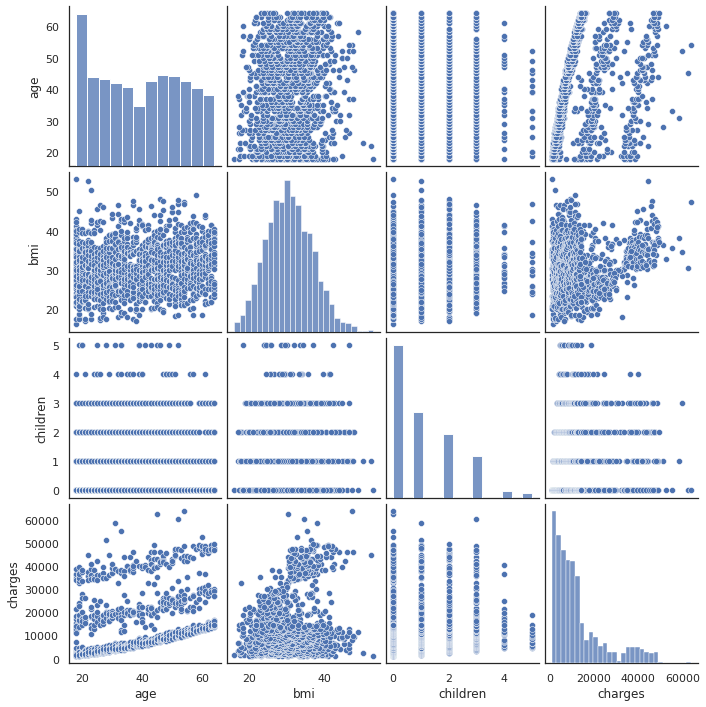

In [ ]:
# to explore relationships, scatterplot is the best graph to use
sns.pairplot(insurance_df)

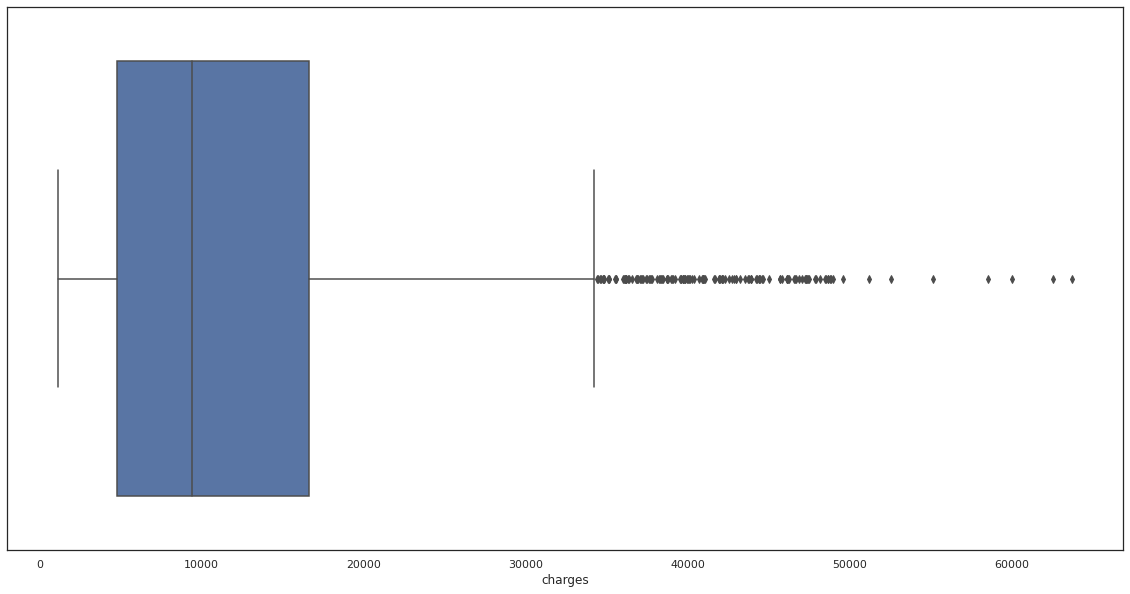

In [ ]:
# to look for outliers in terms of insurance charges, we can use boxplot

sns.boxplot(x=insurance_df["charges"])

Looks like the insurance charges are "right skewed" - the distribution of the insurance charges is positively skewed, i.e. a large number of the patients are enrolled to lower-priced insurance premiums

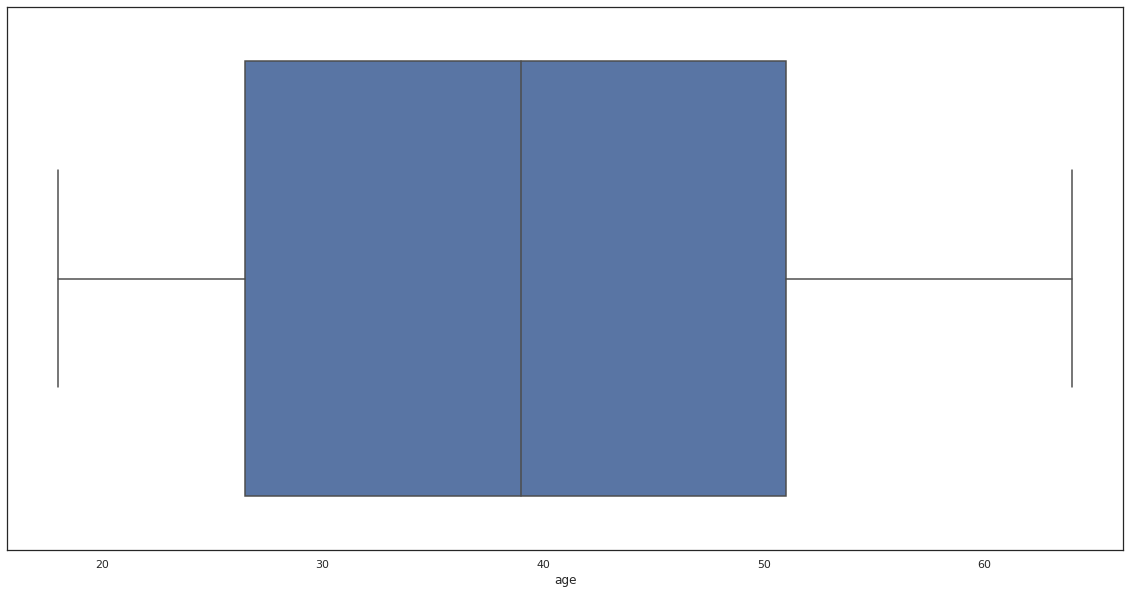

In [ ]:
sns.boxplot(x=insurance_df["age"])

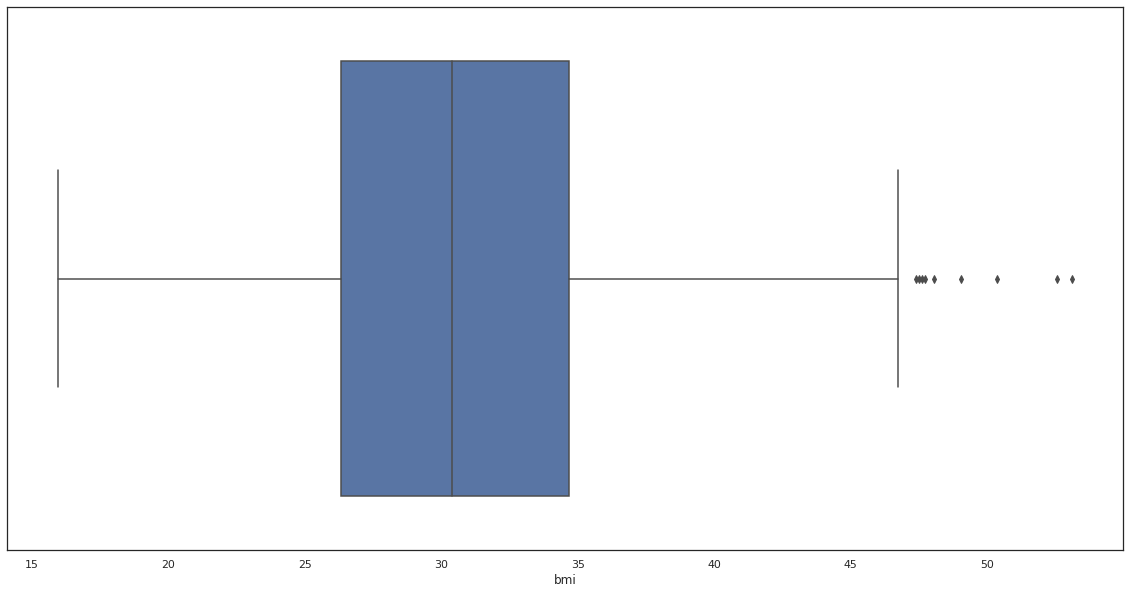

In [ ]:
sns.boxplot(x=insurance_df["bmi"])

The distribution of the patients' bmi appears symmetric, i.e. has a normal distribution.

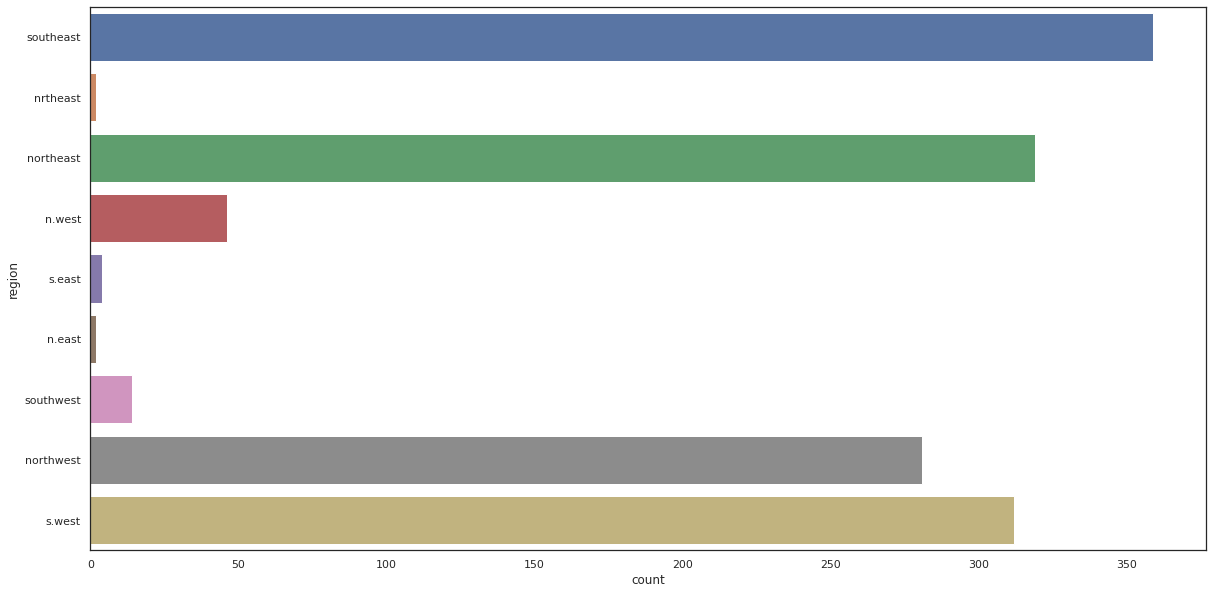

In [ ]:
# to count the distribution (number of records) in categorical columns, we can use the countplot 
sns.countplot(y="region", data=insurance_df)

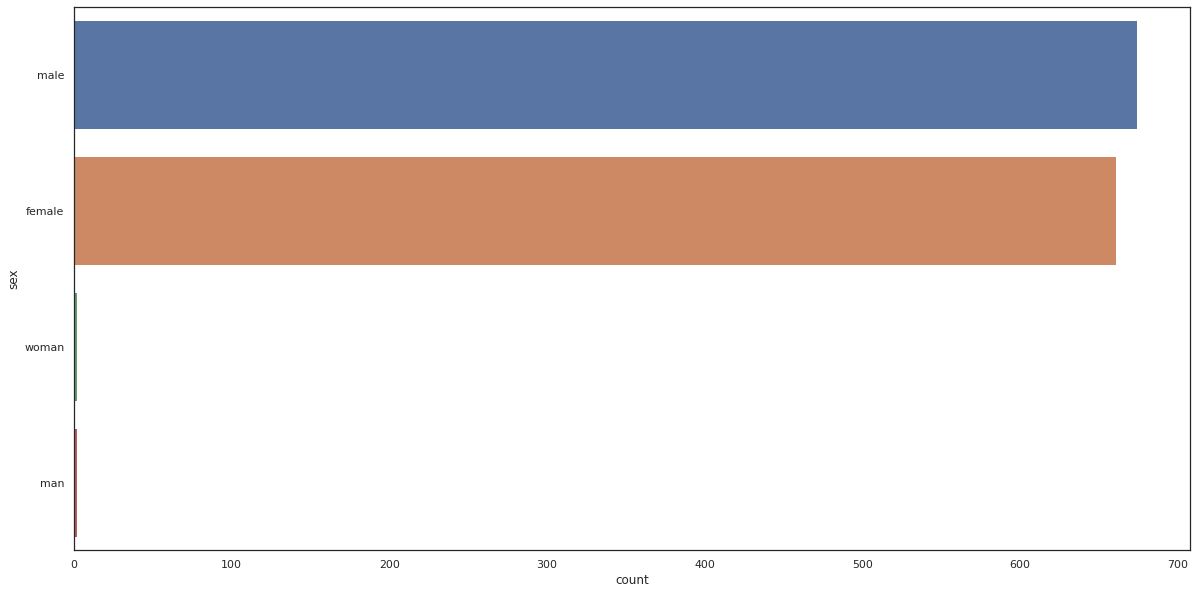

In [ ]:
# to count the distribution in categorical columns, we can use the countplot 
sns.countplot(y="sex", data=insurance_df)

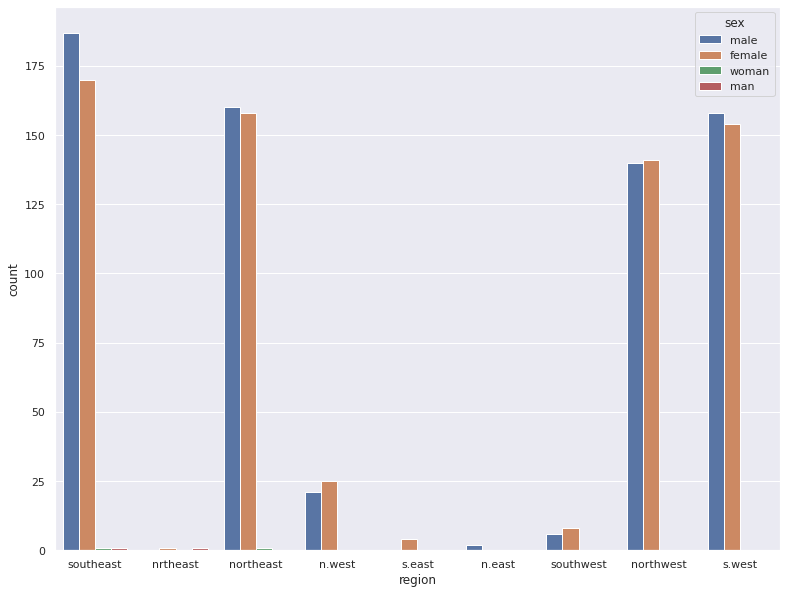

In [ ]:
sns.set(rc={'figure.figsize':(13,10)})
sns.catplot(x="region",hue="sex", data=insurance_df)

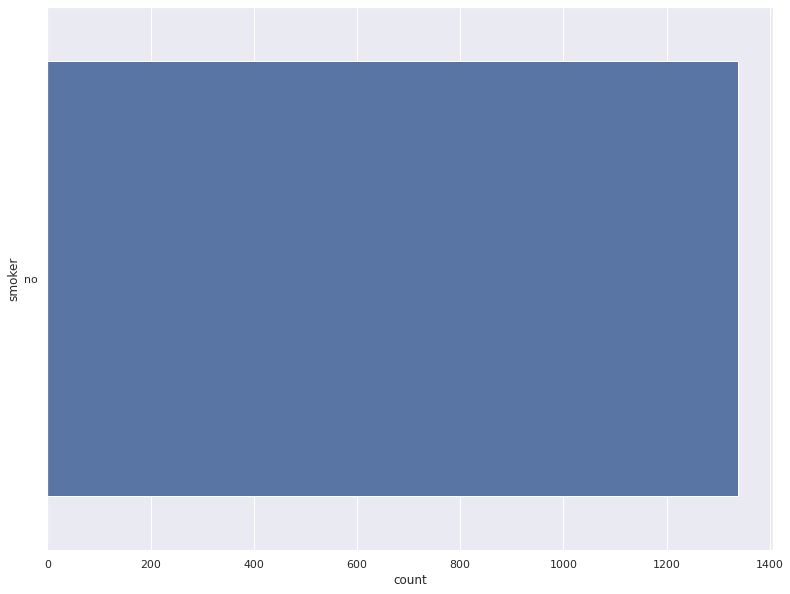

In [ ]:
sns.countplot(y="smoker", data=insurance_df)

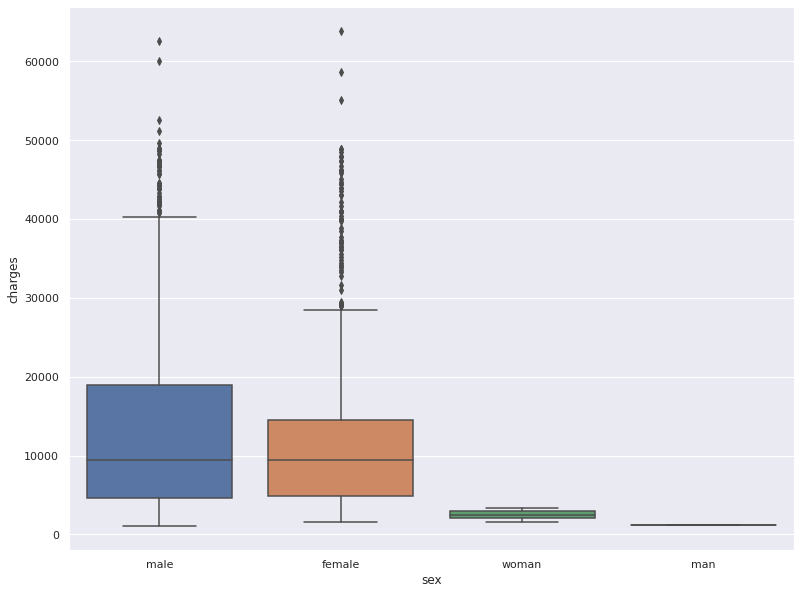

In [ ]:
sns.boxplot(x="sex", y="charges", data=insurance_df)

[(3000.0, 17000.0)]

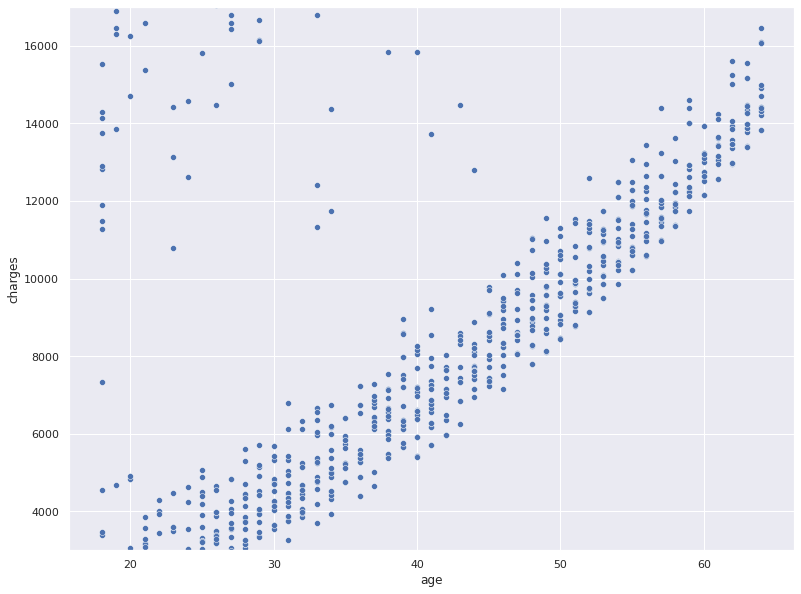

In [ ]:
ax = sns.scatterplot(data=insurance_df, x="age", y="charges")
# control y-axis limits
ax.set(ylim=(3000, 17000))

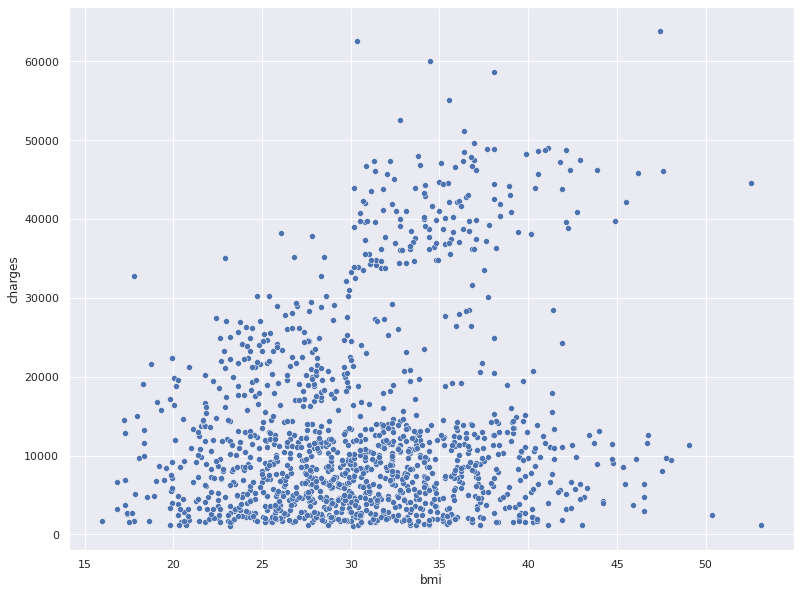

In [ ]:
ax = sns.scatterplot(data=insurance_df, x="bmi", y="charges")

##### **Smoker vs Non Smoker**

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

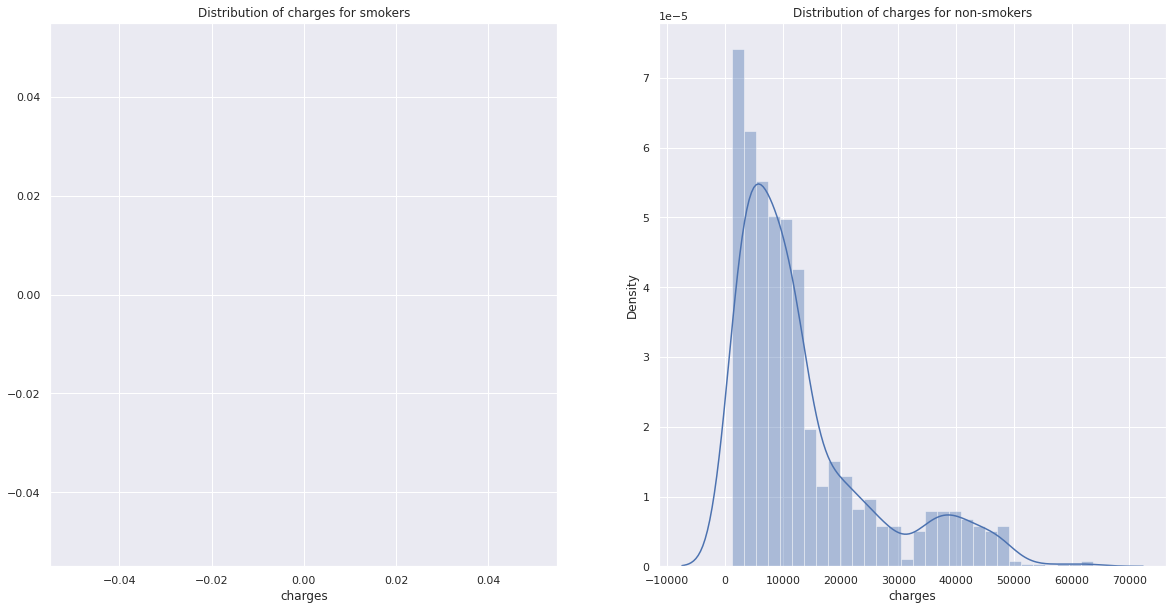

In [ ]:
#@title
# Distribution of Charges split by smoker or non-smoker
f= plt.figure(figsize=(20, 10))

ax = f.add_subplot(121)
sns.distplot(insurance_df[(insurance_df.smoker=='yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax = f.add_subplot(122)
sns.distplot(insurance_df[(insurance_df.smoker=='no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Looks like the non-smokers are getting lower premiums.

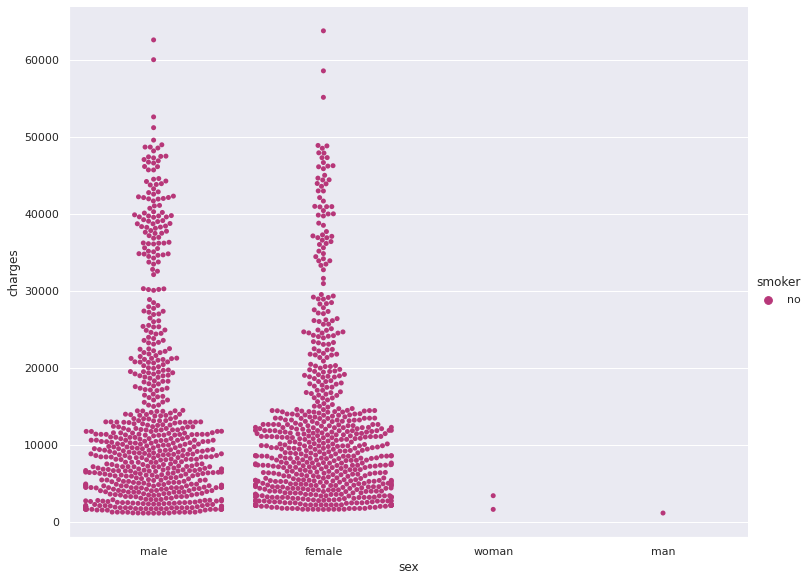

In [ ]:
#@title
f = sns.catplot(x="sex", y="charges", hue="smoker",
          kind="swarm", data=insurance_df, palette = 'magma', height=8, aspect=1.3)

Split by gender,  we still see higher insurance for smokers vs non-smokers.

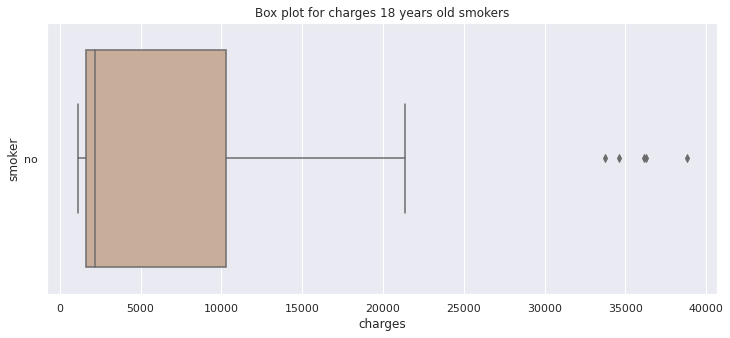

In [ ]:
#@title
# box plots are the best type of viz when looking for outliers
# Box plot for charges 18 years old smokers
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = insurance_df[(insurance_df.age == 18)] , orient="h", palette = 'pink')

18 year old smokers pay around 10 times more than non-smokers.

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

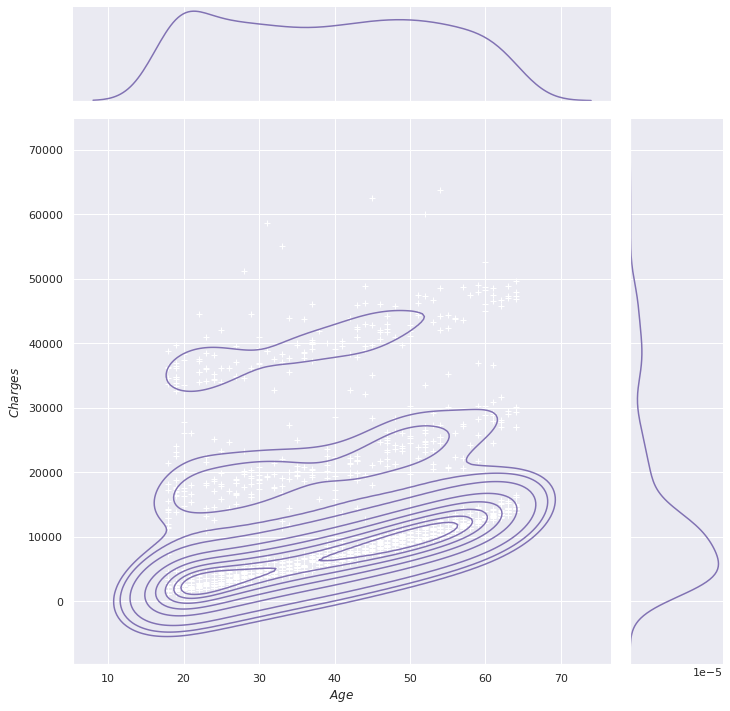

In [ ]:
#@title
# Distribution of charges and age for non-smokers
g = sns.jointplot(x="age", y="charges", data = insurance_df[(insurance_df.smoker == 'no')],kind="kde", color="m", height=10, aspect=1)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Age$", "$Charges$")
ax.set_title('Distribution of charges and age for non-smokers')

For non-smokers, the cost of treatment increases as they grow old.

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

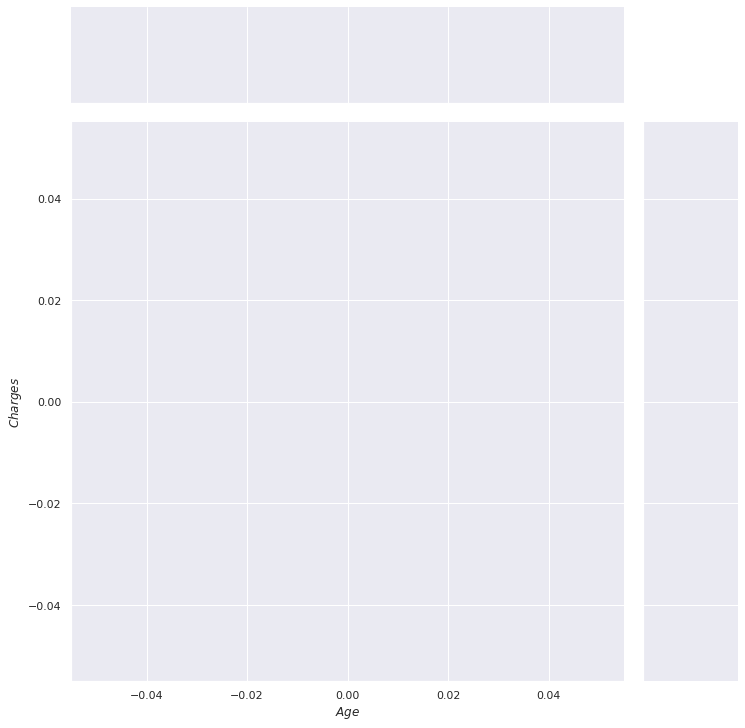

In [ ]:
#@title
# Distribution of charges and age for smokers
g = sns.jointplot(x="age", y="charges", data = insurance_df[(insurance_df.smoker == 'yes')],kind="kde", color="c", height=10, aspect=1)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Age$", "$Charges$")
ax.set_title('Distribution of charges and age for smokers')

We see the same trend for smokers but seeing that its bimodal is probably a peculiarity in the data set, seeing that being a smoker is such a strong indicatore of high insurance charge.

##### **How's the Diet?**

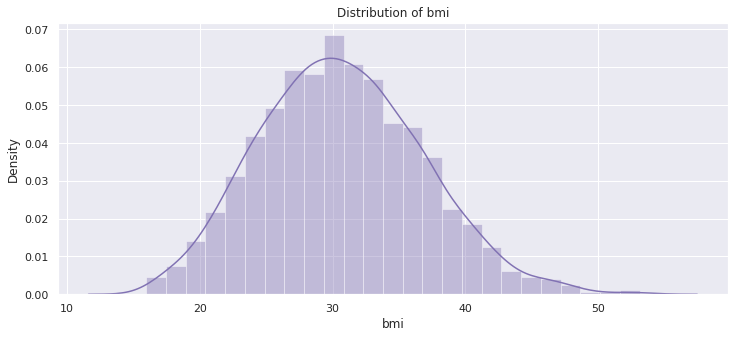

In [ ]:
#@title
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(insurance_df["bmi"], color = 'm')

In [ ]:
insurance_df["bmi"].describe()

count    1337.000000
mean       30.678751
std         6.098401
min        15.960000
25%        26.320000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

Median BMI is 30, which means 50% of the patients are overweight.

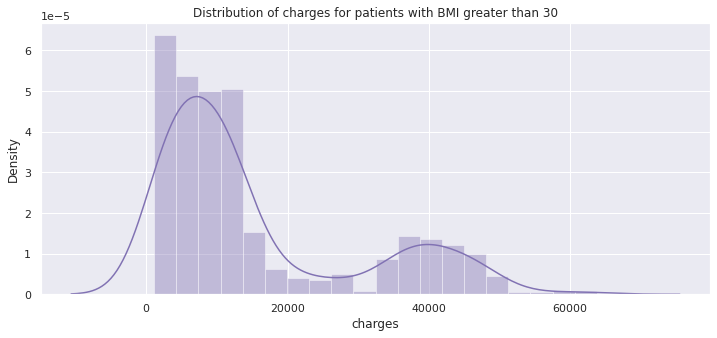

In [ ]:
#@title
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(insurance_df[(insurance_df.bmi >= 30)]['charges'], color = 'm')

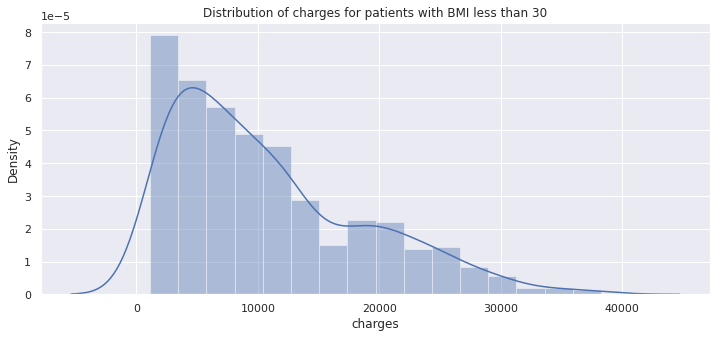

In [ ]:
#@title
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(insurance_df[(insurance_df.bmi < 30)]['charges'], color = 'b')

Distribution of insurance charges for overweight vs non-overweight says that overweight people get charge a higher insurance charge.

Text(0.5, 1.0, 'Distribution of bmi and charges')

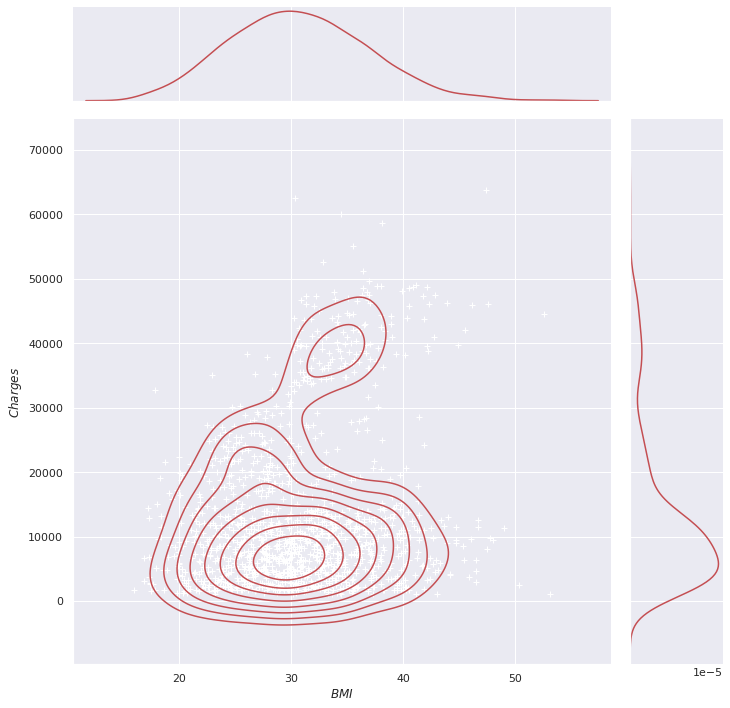

In [ ]:
#@title
g = sns.jointplot(x="bmi", y="charges", data = insurance_df,kind="kde", color="r", height=10, aspect=1)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$BMI$", "$Charges$")
ax.set_title('Distribution of bmi and charges')

##### **Number of Kids**

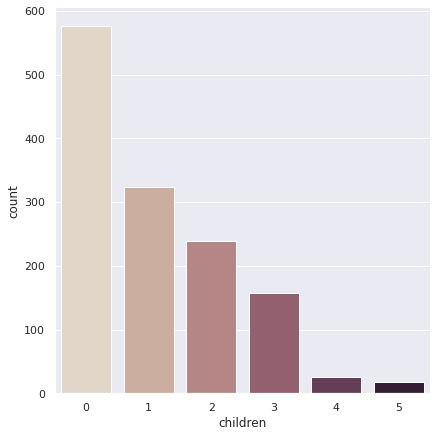

In [ ]:
#@title
sns.catplot(x="children", kind="count", palette="ch:.25", data=insurance_df, size = 6)

Most of these patients have no children.

##### **Do smokers have kids?**

Text(0.5, 1.0, 'Smokers and non-smokers who have children')

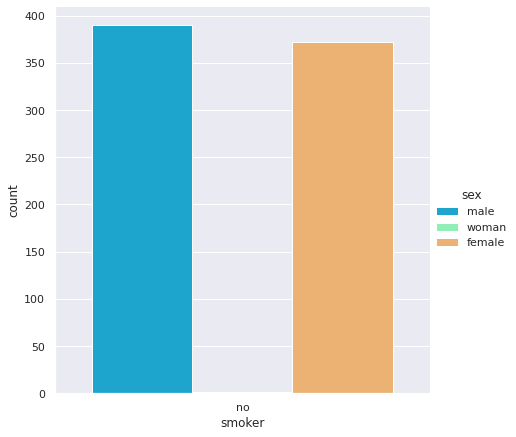

In [ ]:
#@title
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=insurance_df[(insurance_df.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have children')

Majority who have children are non-smokers.

## Pandas Profiling: Speed Up your EDA
===

In [1]:
#@title
!pip install pandas_profiling

In [ ]:
#@title
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Requirement already up-to-date: pandas-profiling[notebook] in /usr/local/lib/python3.6/dist-packages (2.9.0)
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
#@title
import pandas_profiling as pp
from pandas_profiling.utils.cache import cache_file

In [ ]:
#@title
insurance_report = pp.ProfileReport(insurance_df, title='Insurance Pricing Dataset Profiling Report')

In [ ]:
#@title
insurance_report.to_file("insurance_regression.html")

In [ ]:
#@title
files.download('insurance_regression.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Part II: Data cleaning and preparation**

In [ ]:
insurance_df.head(10)

,customer_id,age,sex,bmi,children,smoker,region,charges
0,m18331172523,18,male,33.77,1,no,southeast,1725.55230
1,m18340113711,18,male,34.10,0,no,southeast,NaN
2,f18260219885,18,female,NaN,0,no,nrtheast,2198.18985
3,f18382339335,18,woman,38.67,2,no,northeast,3393.35635
4,f18350221175,18,female,35.63,0,no,n.west,2211.13075
5,f18350221175,18,female,35.63,0,no,n.west,2211.13075
6,f18300213467,18,female,30.12,0,no,northeast,21344.84670
7,m18230170545,18,man,NaN,0,no,nrtheast,NaN
8,m18250155125,18,male,25.18,0,no,northeast,15518.18025
9,f18360361435,18,female,36.85,0,no,s.east,36149.48350


#### **Remove Duplicates**

In [ ]:
# Remove duplicate in customer_id, keep last occurence

insurance_df.drop_duplicates(subset ="customer_id", keep = 'last', inplace = True) 
  
# displaying data 
insurance_df.head(10)

,customer_id,age,sex,bmi,children,smoker,region,charges
0,m18331172523,18,male,33.77,1,no,southeast,1725.55230
1,m18340113711,18,male,34.10,0,no,southeast,NaN
2,f18260219885,18,female,NaN,0,no,nrtheast,2198.18985
3,f18382339335,18,woman,38.67,2,no,northeast,3393.35635
5,f18350221175,18,female,35.63,0,no,n.west,2211.13075
6,f18300213467,18,female,30.12,0,no,northeast,21344.84670
7,m18230170545,18,man,NaN,0,no,nrtheast,NaN
8,m18250155125,18,male,25.18,0,no,northeast,15518.18025
9,f18360361435,18,female,36.85,0,no,s.east,36149.48350
10,m18150169464,18,male,15.96,0,no,northeast,1694.79640


#### **Fix inconsistent labels**

In [ ]:
print(insurance_df['region'].value_counts())

southeast    359
northeast    319
s.west       311
northwest    280
n.west        45
southwest     14
s.east         4
n.east         2
nrtheast       2
Name: region, dtype: int64


In [ ]:
# Fix inconsistent category labels of 'region'

insurance_df['region'].replace('s.west','southwest', inplace=True)
insurance_df['region'].replace('n.west','northwest', inplace=True)
insurance_df['region'].replace('s.east','southeast', inplace=True)
insurance_df['region'].replace('n.east','northeast', inplace=True)
insurance_df['region'].replace('nrtheast','northeast', inplace=True)


In [ ]:
print(insurance_df['region'].value_counts())

southeast    363
northwest    325
southwest    325
northeast    323
Name: region, dtype: int64


In [ ]:
print(insurance_df['sex'].value_counts())

male      672
female    660
man         2
woman       2
Name: sex, dtype: int64


In [ ]:
# Fix inconsistent category labels of 'sex'

insurance_df['sex'].replace('woman','female', inplace=True)
insurance_df['sex'].replace('man','male', inplace=True)

In [ ]:
print(insurance_df['sex'].value_counts())

male      674
female    662
Name: sex, dtype: int64


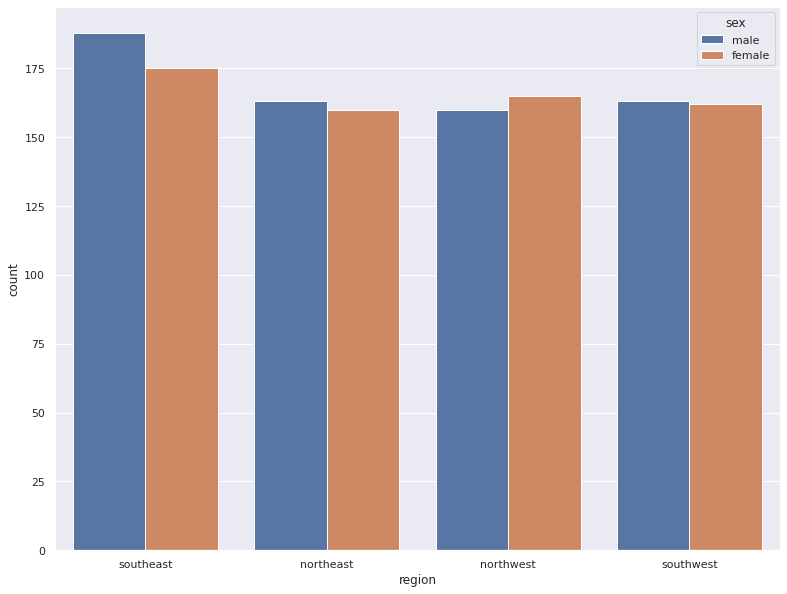

In [ ]:
sns.set(rc={'figure.figsize':(13,10)})
sns.countplot(x="region",hue="sex", data=insurance_df)

#### **Remove columns with low or no variability in values**

In [ ]:
insurance_df.head(10)

,customer_id,age,sex,bmi,children,smoker,region,charges
0,m18331172523,18,male,33.77,1,no,southeast,1725.55230
1,m18340113711,18,male,34.10,0,no,southeast,NaN
2,f18260219885,18,female,NaN,0,no,northeast,2198.18985
3,f18382339335,18,female,38.67,2,no,northeast,3393.35635
5,f18350221175,18,female,35.63,0,no,northwest,2211.13075
6,f18300213467,18,female,30.12,0,no,northeast,21344.84670
7,m18230170545,18,male,NaN,0,no,northeast,NaN
8,m18250155125,18,male,25.18,0,no,northeast,15518.18025
9,f18360361435,18,female,36.85,0,no,southeast,36149.48350
10,m18150169464,18,male,15.96,0,no,northeast,1694.79640


In [ ]:
# Remove 'smoker' column since there's no variability in values

insurance_df = insurance_df.drop(['smoker'], axis=1)
insurance_df.head(10)

,customer_id,age,sex,bmi,children,region,charges
0,m18331172523,18,male,33.77,1,southeast,1725.55230
1,m18340113711,18,male,34.10,0,southeast,NaN
2,f18260219885,18,female,NaN,0,northeast,2198.18985
3,f18382339335,18,female,38.67,2,northeast,3393.35635
5,f18350221175,18,female,35.63,0,northwest,2211.13075
6,f18300213467,18,female,30.12,0,northeast,21344.84670
7,m18230170545,18,male,NaN,0,northeast,NaN
8,m18250155125,18,male,25.18,0,northeast,15518.18025
9,f18360361435,18,female,36.85,0,southeast,36149.48350
10,m18150169464,18,male,15.96,0,northeast,1694.79640


#### **Handle missing values**

In [ ]:
insurance_df.isnull().sum()

customer_id    0
age            0
sex            0
bmi            2
children       0
region         0
charges        3
dtype: int64

In [ ]:
# Impute missing 'bmi' values
# Use mean if distribution is symmetric, else use median

# insurance_df['bmi'] = insurance_df['bmi'].fillna((insurance_df['bmi'].median()))

insurance_df['bmi'] = insurance_df['bmi'].fillna((insurance_df['bmi'].mean()))

In [ ]:
insurance_df.isnull().sum()

customer_id    0
age            0
sex            0
bmi            0
children       0
region         0
charges        3
dtype: int64

In [ ]:
# Impute missing 'charges' values
# Use mean if distribution is symmetric, else use median

# insurance_df['charges'] = insurance_df['charges'].fillna((insurance_df['charges'].mean()))

insurance_df['charges'] = insurance_df['charges'].fillna((insurance_df['charges'].median()))

In [ ]:
insurance_df.isnull().sum()

customer_id    0
age            0
sex            0
bmi            0
children       0
region         0
charges        0
dtype: int64

#### **Final touches**

Since we are primarily interested in the amount of costs see what factors are more correlated with charges. For a start, we will encode categorical features.


In [ ]:
#@title
insurance_df = insurance_df.drop(['customer_id'], axis=1)
insurance_df.head(1)

,age,sex,bmi,children,region,charges
0,18,male,33.77,1,southeast,1725.5523


In [ ]:
#@title
# Convert strings to onehot encoding

onehot_df = pd.get_dummies(insurance_df)
onehot_df.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,18,33.770000,1,1725.55230,0,1,0,0,1,0
1,18,34.100000,0,9391.34600,0,1,0,0,1,0
2,18,30.672316,0,2198.18985,1,0,1,0,0,0
3,18,38.670000,2,3393.35635,1,0,1,0,0,0
5,18,35.630000,0,2211.13075,1,0,0,1,0,0


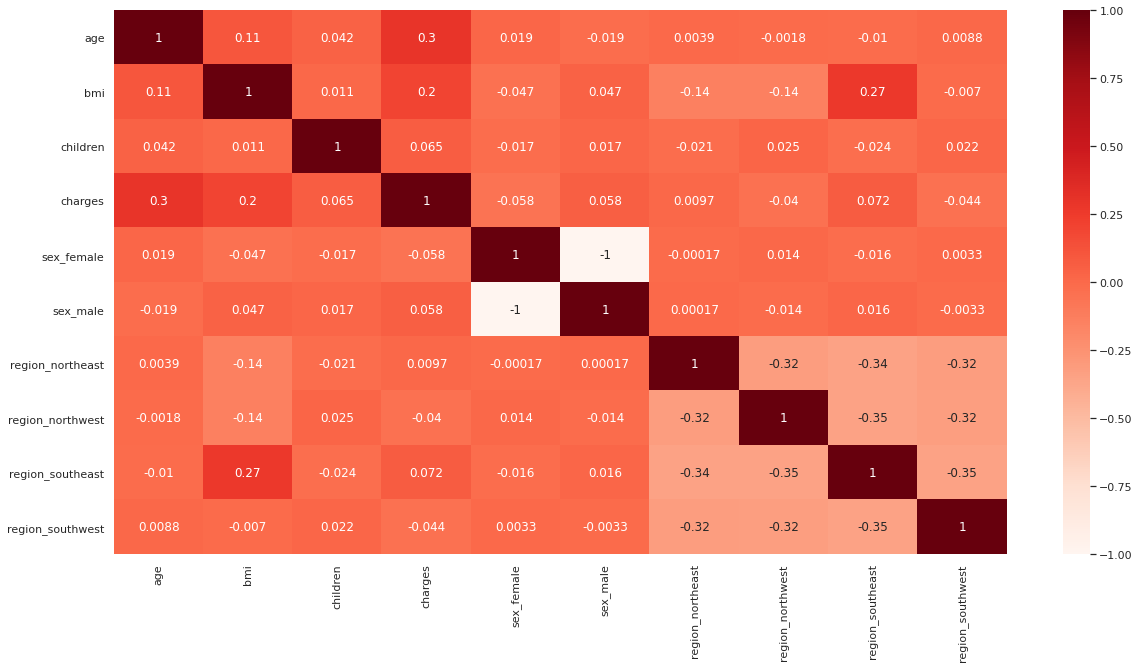

In [ ]:
#@title
plt.subplots(figsize=(20,10))
sns.heatmap(onehot_df.corr(), annot=True, cmap='Reds')

- We can see that insurance charges are higher if the person is a smoker. 
- A minor side note is that, there is a weak correlation between BMI and the region_southeast.

**Challenge:**

Run all the EDA code above (not including data cleaning and prep section), including the Pandas Profiling section, but on the insurance_regression.csv dataset

Reference: 

[Insurance Analysis Colab Notebook](https://colab.research.google.com/drive/1uhjvtqKUBCg4EHnJ6Zfzj7aZ0EjJgyzT?usp=sharing)

Link to Data prep group work: 

[Data prep group work](https://colab.research.google.com/drive/1LQWvI-s91FHHYSMrGjZzWEfOmhsiqXPE?usp=sharing)